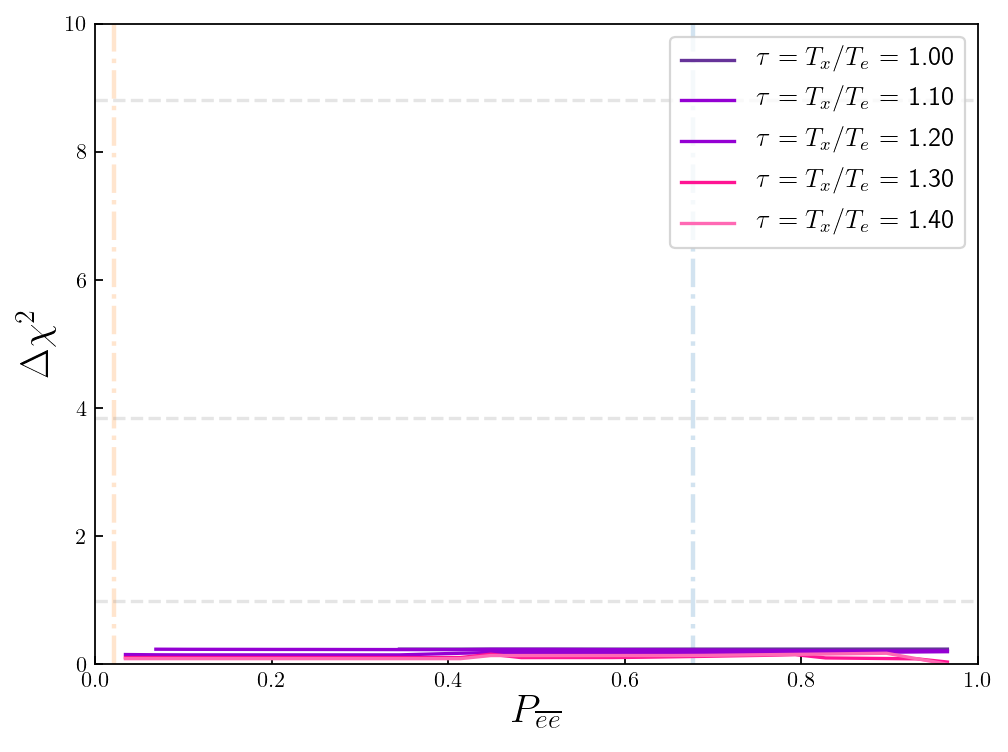

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flavor_conversion import *
from scipy.stats import chi2   
plt.style.use('style.mplstyle')

#This data have efficiency, background
tau_vec=[1,1.1,1.2,1.3,1.4]
x_Pee=[]
L_Pee=[]

#Load
for tau in tau_vec:
    x_Pee.append(np.load("Output/Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"))
    L_Pee.append(np.load("Output/Like_Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"))
    
L_min=10**50
for i in range(len(tau_vec)):
    if L_min>np.amin(L_Pee[i]):
        L_min=np.amin(L_Pee[i])


###################################################################################
al = 0.2
paleta = ['rebeccapurple','darkviolet','darkviolet','deeppink','hotpink']

plt.figure(dpi=160)


Pee_NH = Pe_surv(0,"NH")
Pee_IH = Pe_surv(0,"IH")
plt.plot(Pee_NH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)
plt.plot(Pee_IH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)

for i in range(len(tau_vec)):
    plt.plot(x_Pee[i],L_Pee[i]-L_min,'-', c=paleta[i], label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))

plt.xlabel(r'$P_{\overline{ee}}$', fontsize=18)
plt.ylabel(r'$\Delta\chi^2$', fontsize=18)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.997, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.95, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.68, 1),'--', color='gray', alpha=al)
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots_paper/Pee_SN1987A_time_integrated_alpha_2.3_EH_Limit_1.pdf',dpi=160)
plt.show()